# Mature Leaves Observations for Mango in Kerala 

Seasons assigned to the visual: 

- Winter: January to February (Weeks 1-8)
- Summer: March to May (Weeks 9-22)
- Monsoon: June to September (Weeks 23-39)
- Post-Monsoon: October to December (Weeks 40-52)

In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import linregress

In [3]:
#loading the data
file_path = '/.../cleaned_alldata_version2.csv' #enter your path here
data = pd.read_csv(file_path)


# Year 2020 

In [ ]:

# Filter the dataset for 'Mango' in Kerala for the year 2020
mango_data_2020 = data[(data['Species_name'].str.contains('Mango', case=False)) &
                       (data['Year'] == 2020) &
                       (data['State_name'] == 'Kerala')]

# Summarize the presence of mature leaves across different weeks
mango_mature_leaves = mango_data_2020.groupby('Week')['Leaves_mature'].sum().reset_index()

#Wnter:January to February (Weeks 1-8)
#Summer: March to May (Weeks 9-22)
#Monsoon: June to September (Weeks 23-39)
#Post-Monsoon: October to December (Weeks 40-52)


plt.figure(figsize=(10, 6))

plt.plot(mango_mature_leaves['Week'], mango_mature_leaves['Leaves_mature'], marker='o', linestyle='-', color='b', label='Mature Leaves Observations')


plt.axvline(x=8, color='purple', linestyle='--', label='End of Winter')  # End of Winter
plt.axvline(x=22, color='orange', linestyle='--', label='End of Summer')  # End of Summer
plt.axvline(x=39, color='green', linestyle='--', label='End of Monsoon')  # End of Monsoon
plt.axvspan(1, 8, color='lightblue', alpha=0.2, label='Winter')
plt.axvspan(9, 22, color='yellow', alpha=0.2, label='Summer')
plt.axvspan(23, 39, color='lightgreen', alpha=0.2, label='Monsoon')
plt.axvspan(40, 52, color='lightcoral', alpha=0.2, label='Post-Monsoon')

plt.title('Mature Leaves Observations for Mango in Kerala (2020)')
plt.xlabel('Week')
plt.ylabel('Number of Mature Leaves Observations')
plt.grid(True)


plt.legend(loc='upper right')


plt.tight_layout()
plt.show()



# Attempt 2 at making the visualization more accessible to reviewers

/var/folders/ys/3475k00n0gl_64cf8s8c35dc0000gn/T/ipykernel_69796/782926798.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Leaves_mature_smooth'] = season_data['Leaves_mature'].rolling(window=2, min_periods=1).mean()  # Rolling average
/var/folders/ys/3475k00n0gl_64cf8s8c35dc0000gn/T/ipykernel_69796/782926798.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Leaves_mature_smooth'] = season_data['Leaves_mature'].rolling(window=2, min_periods=1).mean()  # Rolling average
/var

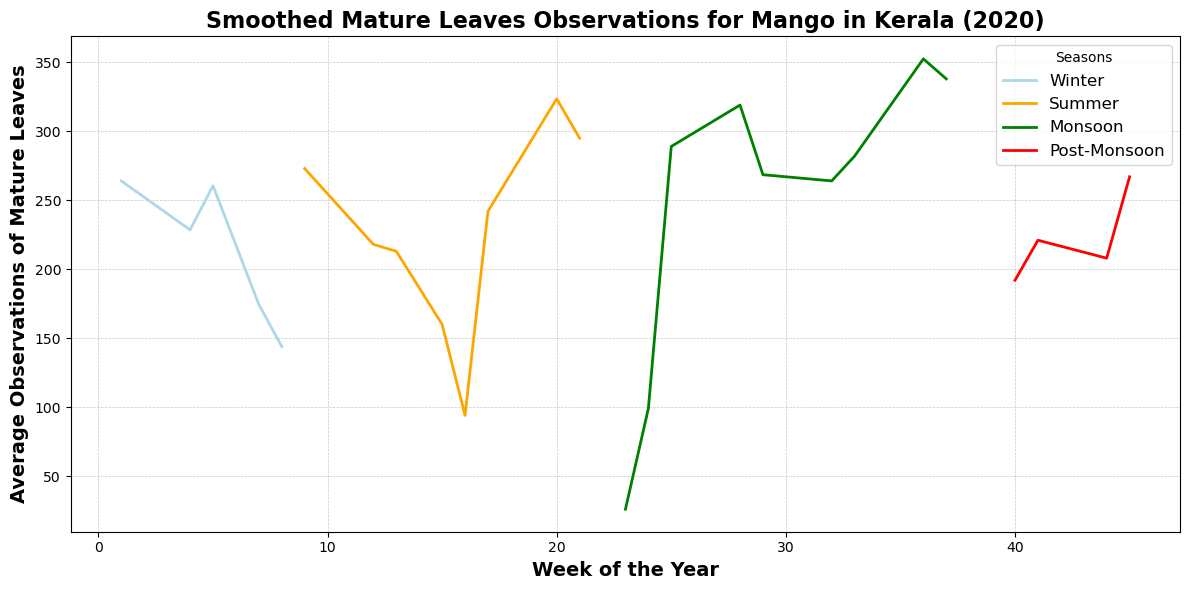

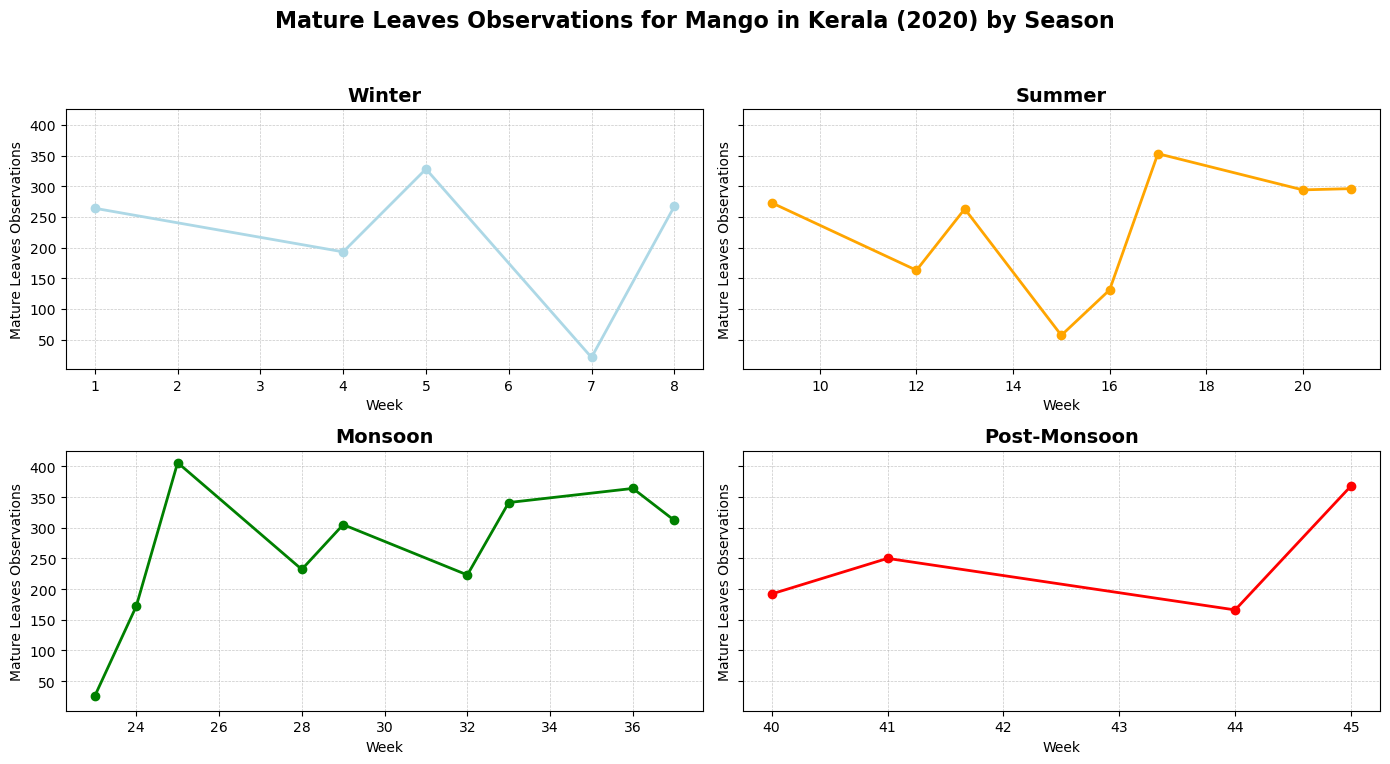

In [5]:


#'Mango' in Kerala for the year 2020
mango_data_2020 = data[(data['Species_name'].str.contains('Mango', case=False)) &
                       (data['Year'] == 2020) &
                       (data['State_name'] == 'Kerala')]

#  presence of mature leaves across different weeks
mango_mature_leaves = mango_data_2020.groupby('Week')['Leaves_mature'].sum().reset_index()

# seasonal ranges and colors
season_ranges = {
    "Winter": (1, 8),
    "Summer": (9, 22),
    "Monsoon": (23, 39),
    "Post-Monsoon": (40, 52)
}
season_colors = {
    "Winter": "lightblue",
    "Summer": "orange",
    "Monsoon": "green",
    "Post-Monsoon": "red"
}

# smoothed line

plt.figure(figsize=(12, 6))

for season, (start, end) in season_ranges.items():
    # Filter and smooth data for each season
    season_data = mango_mature_leaves[(mango_mature_leaves['Week'] >= start) & (mango_mature_leaves['Week'] <= end)]
    season_data['Leaves_mature_smooth'] = season_data['Leaves_mature'].rolling(window=2, min_periods=1).mean()  # Rolling average

    # Plotting for each season
    plt.plot(season_data['Week'], season_data['Leaves_mature_smooth'], color=season_colors[season], linewidth=2, label=season)

plt.title('Smoothed Mature Leaves Observations for Mango in Kerala (2020)', fontsize=16, fontweight='bold')
plt.xlabel('Week of the Year', fontsize=14, fontweight='bold')
plt.ylabel('Average Observations of Mature Leaves', fontsize=14, fontweight='bold')

# Legend 
plt.legend(title="Seasons", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Seasonal Breakdown with Subplots 

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
axes = axes.flatten()

for i, (season, (start, end)) in enumerate(season_ranges.items()):
    # Filter for each season
    season_data = mango_mature_leaves[(mango_mature_leaves['Week'] >= start) & (mango_mature_leaves['Week'] <= end)]
    
    # Plot line plot for each season in its own subplot
    axes[i].plot(season_data['Week'], season_data['Leaves_mature'], marker='o', color=season_colors[season], linewidth=2)
    axes[i].set_title(f"{season}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Week')
    axes[i].set_ylabel('Mature Leaves Observations')
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

fig.suptitle('Mature Leaves Observations for Mango in Kerala (2020) by Season', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


## statistical analysis PRE HISTORICAL DATA USAGE

/var/folders/ys/3475k00n0gl_64cf8s8c35dc0000gn/T/ipykernel_69796/1552666643.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Smoothed_Leaves'] = season_data['Average_Mature_Leaves'].rolling(window=2, min_periods=1).mean()
/var/folders/ys/3475k00n0gl_64cf8s8c35dc0000gn/T/ipykernel_69796/1552666643.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Smoothed_Leaves'] = season_data['Average_Mature_Leaves'].rolling(window=2, min_periods=1).mean()
/var/folders/ys/3475k00n0gl_64cf8s

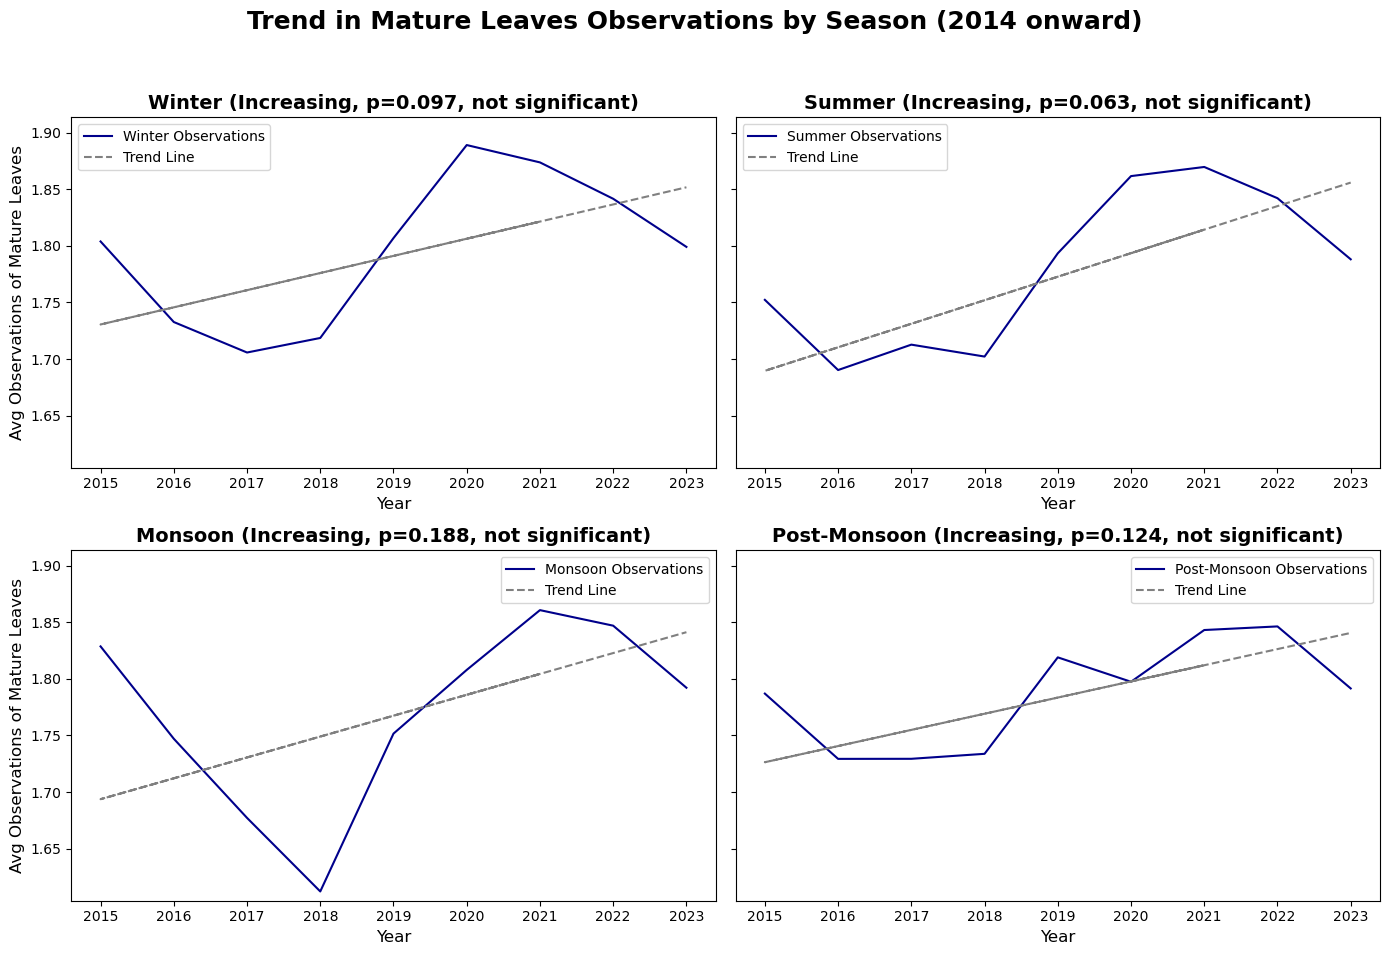

In [9]:
# Filter data for Mango in Kerala from 2014 onward
mango_data = data[(data['Species_name'].str.contains('Mango', case=False)) &
                  (data['State_name'] == 'Kerala') &
                  (data['Year'] >= 2014)]

#  Seasonal Averages by Year
season_ranges = {
    "Winter": (1, 8),
    "Summer": (9, 22),
    "Monsoon": (23, 39),
    "Post-Monsoon": (40, 52)
}

season_averages = []
for year in mango_data['Year'].unique():
    for season, (start, end) in season_ranges.items():
        season_data = mango_data[(mango_data['Week'] >= start) & (mango_data['Week'] <= end) & (mango_data['Year'] == year)]
        avg_leaves = season_data['Leaves_mature'].mean()
        season_averages.append({'Year': year, 'Season': season, 'Average_Mature_Leaves': avg_leaves})

season_avg_df = pd.DataFrame(season_averages)

# y axis range across all data
y_min, y_max = season_avg_df['Average_Mature_Leaves'].min(), season_avg_df['Average_Mature_Leaves'].max()

# linear reg for trends with improvements
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
fig.suptitle('Trend in Mature Leaves Observations by Season (2014 onward)', fontsize=18, fontweight='bold')
axes = axes.flatten()

for i, (season, (start, end)) in enumerate(season_ranges.items()):
    season_data = season_avg_df[season_avg_df['Season'] == season]
    
    # linear reg
    slope, intercept, r_value, p_value, std_err = linregress(season_data['Year'], season_data['Average_Mature_Leaves'])
    trend_line = intercept + slope * season_data['Year']
    
    # smooth line with a rolling average
    season_data['Smoothed_Leaves'] = season_data['Average_Mature_Leaves'].rolling(window=2, min_periods=1).mean()
    
    # Plot 
    sns.lineplot(ax=axes[i], x='Year', y='Smoothed_Leaves', data=season_data, color='darkblue', label=f"{season} Observations")
    
    # trend line based on p-value
    trend_color = 'red' if p_value < 0.05 else 'grey'
    axes[i].plot(season_data['Year'], trend_line, linestyle='--', color=trend_color, label='Trend Line')
    
    axes[i].set_ylim(y_min, y_max)
    
    #labels
    significance = "significant" if p_value < 0.05 else "not significant"
    trend_direction = "Increasing" if slope > 0 else "Decreasing"
    axes[i].set_title(f"{season} ({trend_direction}, p={p_value:.3f}, {significance})", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Year', fontsize=12)
    axes[i].set_ylabel('Avg Observations of Mature Leaves', fontsize=12)
    axes[i].legend(fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## ANALYSIS WITH HISTORICAL DATA USAGE (defined by years)

- Historical data = 2014 -2020


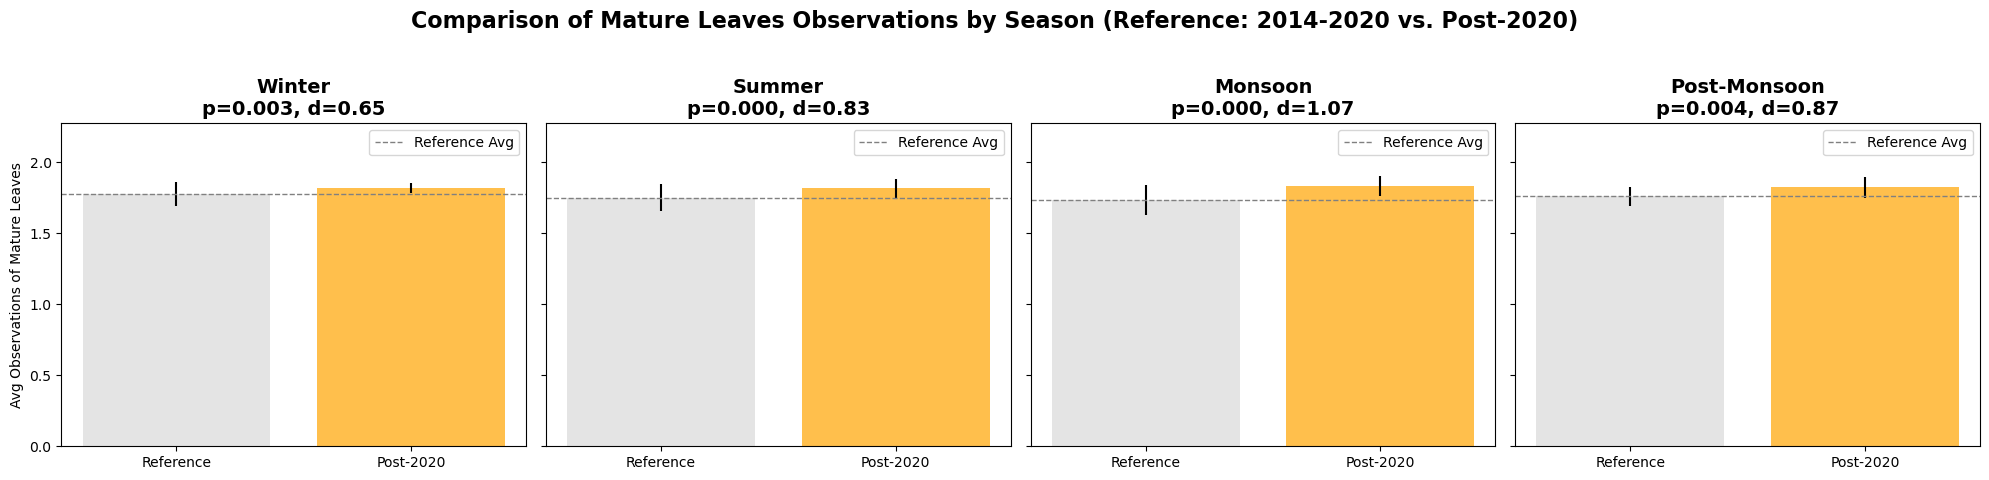

In [11]:

mango_data = data[(data['Species_name'].str.contains('Mango', case=False)) &
                  (data['State_name'] == 'Kerala')]

# periods
reference_period = mango_data[(mango_data['Year'] >= 2014) & (mango_data['Year'] <= 2020)]
post_2020_period = mango_data[mango_data['Year'] > 2020]

season_ranges = {
    "Winter": (1, 8),
    "Summer": (9, 22),
    "Monsoon": (23, 39),
    "Post-Monsoon": (40, 52)
}
season_colors = {
    "Reference Period": "lightgrey",
    "Post-2020": "orange"
}

# seasonal averages for reference and post-2020 
seasonal_stats = []
for season, (start, end) in season_ranges.items():
    ref_data = reference_period[(reference_period['Week'] >= start) & (reference_period['Week'] <= end)]
    post2020_data = post_2020_period[(post_2020_period['Week'] >= start) & (post_2020_period['Week'] <= end)]
    
    # mean and std dev
    ref_mean = ref_data.groupby('Year')['Leaves_mature'].mean().mean()
    ref_std = ref_data.groupby('Year')['Leaves_mature'].mean().std()
    post2020_mean = post2020_data.groupby('Year')['Leaves_mature'].mean().mean()
    post2020_std = post2020_data.groupby('Year')['Leaves_mature'].mean().std()
    
    # t-test to check for significant change
    t_stat, p_value = ttest_ind(ref_data['Leaves_mature'], post2020_data['Leaves_mature'], equal_var=False)
    
    # effect size (Cohen's d)
    cohen_d = (post2020_mean - ref_mean) / np.sqrt(((ref_std ** 2 + post2020_std ** 2) / 2))
    
    # storing data
    seasonal_stats.append({
        'Season': season,
        'Reference Mean': ref_mean,
        'Reference Std Dev': ref_std,
        'Post-2020 Mean': post2020_mean,
        'Post-2020 Std Dev': post2020_std,
        'p-value': p_value,
        'Cohen\'s d': cohen_d
    })

seasonal_stats_df = pd.DataFrame(seasonal_stats)

# comparison plots 
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Comparison of Mature Leaves Observations by Season (Reference: 2014-2020 vs. Post-2020)', fontsize=16, fontweight='bold')

for i, season in enumerate(seasonal_stats_df['Season']):
    ref_mean = seasonal_stats_df.loc[seasonal_stats_df['Season'] == season, 'Reference Mean'].values[0]
    ref_std = seasonal_stats_df.loc[seasonal_stats_df['Season'] == season, 'Reference Std Dev'].values[0]
    post_mean = seasonal_stats_df.loc[seasonal_stats_df['Season'] == season, 'Post-2020 Mean'].values[0]
    post_std = seasonal_stats_df.loc[seasonal_stats_df['Season'] == season, 'Post-2020 Std Dev'].values[0]
    p_value = seasonal_stats_df.loc[seasonal_stats_df['Season'] == season, 'p-value'].values[0]
    cohen_d = seasonal_stats_df.loc[seasonal_stats_df['Season'] == season, 'Cohen\'s d'].values[0]
    
    # Overlay bars for reference and post-2020 periods
    axes[i].bar("Reference", ref_mean, yerr=ref_std, color=season_colors["Reference Period"], alpha=0.6)
    axes[i].bar("Post-2020", post_mean, yerr=post_std, color=season_colors["Post-2020"], alpha=0.7)
    
    # baseline reference line
    axes[i].axhline(y=ref_mean, color="grey", linestyle="--", linewidth=1, label="Reference Avg")
    
    # p-value and effect size
    axes[i].set_title(f"{season}\np={p_value:.3f}, d={cohen_d:.2f}", fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Avg Observations of Mature Leaves' if i == 0 else "")
    axes[i].set_ylim(0, max(ref_mean + ref_std, post_mean + post_std) * 1.2)
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### potential use of climate data from: https://climateknowledgeportal.worldbank.org/country/india/climate-data-historical

1. Calculate the average onset week (first week with mature leaves) for each season in both the reference period (2014-2020) and post-2020.
    - For each season, it calculates the average "onset week" (first appearance of mature leaves) during the reference period and post-2020.
    - It then computes the difference, Onset Shift (Weeks), which shows if the post-2020 onset has shifted earlier or later on average.
2. Perform a trend slope comparison for each season between the reference period and post-2020.
    - For each season, it calculates the slope of the trend in average mature leaves observations over time for both the reference and post-2020 periods.
    - Slope Difference indicates if the trend in post-2020 differs significantly from the reference trend, potentially signaling a shift in growth patterns.

In [14]:


# Initialize results storage
onset_shifts = []
slope_comparisons = []

# Calculate onset shifts and trend slopes
for season, (start, end) in season_ranges.items():
    # Onset shift: find the first week with non-zero mature leaf observations
    ref_onset_weeks = reference_period[(reference_period['Week'] >= start) & (reference_period['Week'] <= end)]
    ref_onset_week_avg = ref_onset_weeks[ref_onset_weeks['Leaves_mature'] > 0].groupby('Year')['Week'].min().mean()

    post_onset_weeks = post_2020_period[(post_2020_period['Week'] >= start) & (post_2020_period['Week'] <= end)]
    post_onset_week_avg = post_onset_weeks[post_onset_weeks['Leaves_mature'] > 0].groupby('Year')['Week'].min().mean()

    onset_shifts.append({
        'Season': season,
        'Reference Onset Week (Avg)': ref_onset_week_avg,
        'Post-2020 Onset Week (Avg)': post_onset_week_avg,
        'Onset Shift (Weeks)': post_onset_week_avg - ref_onset_week_avg
    })
    
    # Trend slope comparison
    ref_season_avg = ref_onset_weeks.groupby('Year')['Leaves_mature'].mean().reset_index()
    post_season_avg = post_onset_weeks.groupby('Year')['Leaves_mature'].mean().reset_index()

    # Calculate slopes for each period
    ref_slope, _, _, _, _ = linregress(ref_season_avg['Year'], ref_season_avg['Leaves_mature'])
    post_slope, _, _, _, _ = linregress(post_season_avg['Year'], post_season_avg['Leaves_mature'])

    slope_comparisons.append({
        'Season': season,
        'Reference Period Slope': ref_slope,
        'Post-2020 Period Slope': post_slope,
        'Slope Difference': post_slope - ref_slope
    })

# Convert results to DataFrames for readability
onset_shifts_df = pd.DataFrame(onset_shifts)
slope_comparisons_df = pd.DataFrame(slope_comparisons)

# Display results
print("Onset Shifts by Season:")
print(onset_shifts_df)
print("\nSlope Comparisons by Season:")
print(slope_comparisons_df)


Onset Shifts by Season:
         Season  Reference Onset Week (Avg)  Post-2020 Onset Week (Avg)  \
0        Winter                         1.0                    1.000000   
1        Summer                         9.0                    9.666667   
2       Monsoon                        23.0                   23.000000   
3  Post-Monsoon                        40.0                   40.000000   

   Onset Shift (Weeks)  
0             0.000000  
1             0.666667  
2             0.000000  
3             0.000000  

Slope Comparisons by Season:
         Season  Reference Period Slope  Post-2020 Period Slope  \
0        Winter                0.034655               -0.035720   
1        Summer                0.043904               -0.065812   
2       Monsoon                0.020989               -0.070180   
3  Post-Monsoon                0.025870               -0.071411   

   Slope Difference  
0         -0.070375  
1         -0.109716  
2         -0.091168  
3         -0.097281  

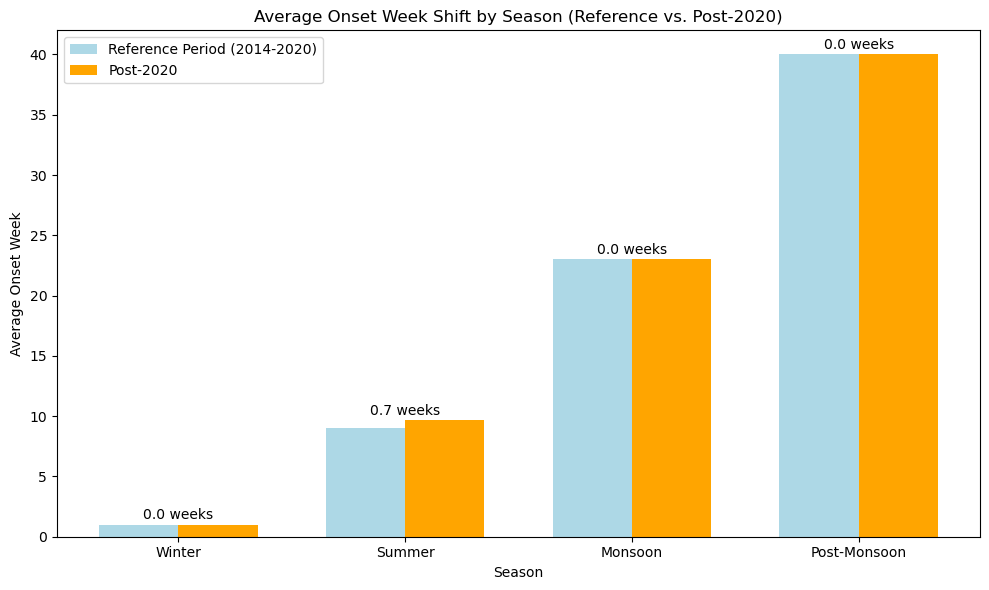

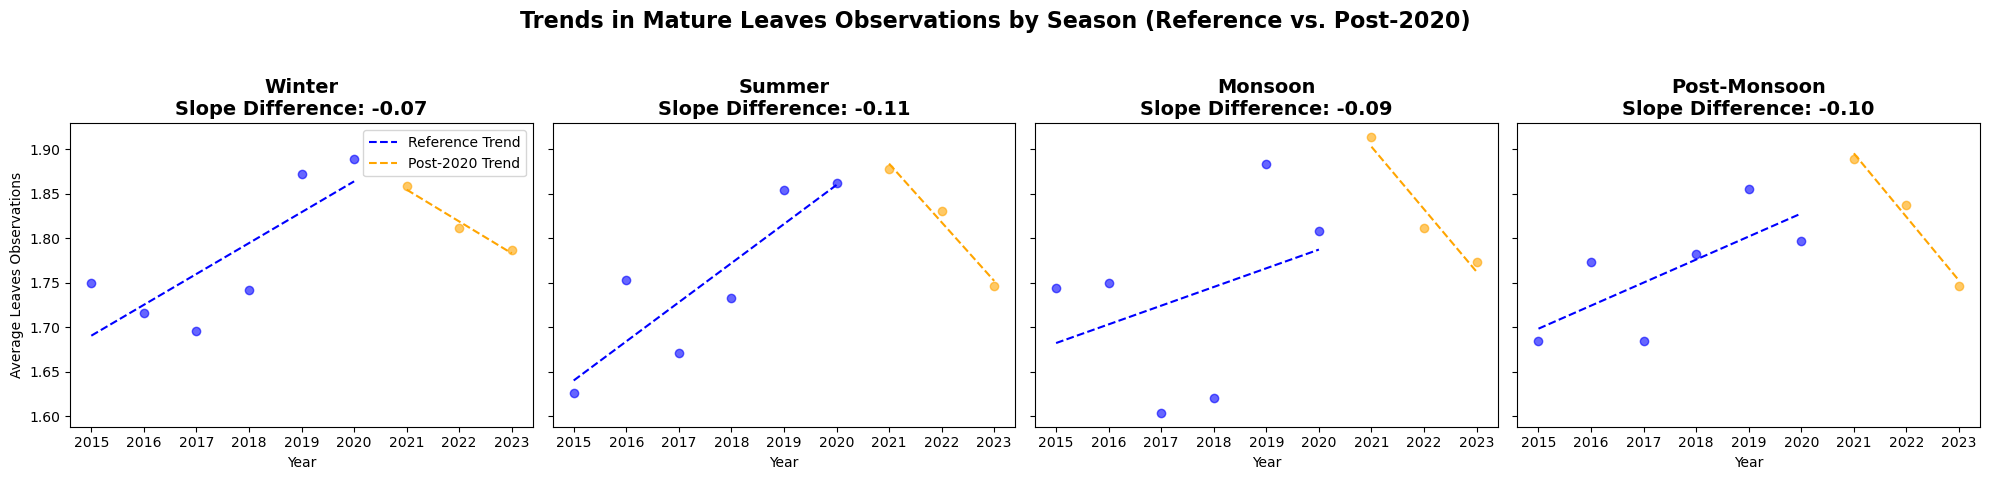

In [15]:

# Onset shifts viz
plt.figure(figsize=(10, 6))
seasons = onset_shifts_df['Season']
ref_onset = onset_shifts_df['Reference Onset Week (Avg)']
post_onset = onset_shifts_df['Post-2020 Onset Week (Avg)']
shift = onset_shifts_df['Onset Shift (Weeks)']

bar_width = 0.35
x = np.arange(len(seasons))

# bars for reference and post-2020 onset weeks
plt.bar(x - bar_width/2, ref_onset, bar_width, label='Reference Period (2014-2020)', color='lightblue')
plt.bar(x + bar_width/2, post_onset, bar_width, label='Post-2020', color='orange')

for i in range(len(seasons)):
    plt.text(x[i], max(ref_onset[i], post_onset[i]) + 0.2, f"{shift[i]:.1f} weeks", ha='center', va='bottom', fontsize=10)

plt.xticks(x, seasons)
plt.xlabel('Season')
plt.ylabel('Average Onset Week')
plt.title('Average Onset Week Shift by Season (Reference vs. Post-2020)')
plt.legend()
plt.tight_layout()
plt.show()

# Slope comparisons 
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Trends in Mature Leaves Observations by Season (Reference vs. Post-2020)', fontsize=16, fontweight='bold')

for i, season in enumerate(slope_comparisons_df['Season']):
    # filter data for the season
    ref_season_data = reference_period[(reference_period['Week'] >= season_ranges[season][0]) & 
                                       (reference_period['Week'] <= season_ranges[season][1])].groupby('Year')['Leaves_mature'].mean().reset_index()
    post_season_data = post_2020_period[(post_2020_period['Week'] >= season_ranges[season][0]) & 
                                        (post_2020_period['Week'] <= season_ranges[season][1])].groupby('Year')['Leaves_mature'].mean().reset_index()
    
    # reference period trend
    ref_slope, ref_intercept, _, _, _ = linregress(ref_season_data['Year'], ref_season_data['Leaves_mature'])
    axes[i].plot(ref_season_data['Year'], ref_intercept + ref_slope * ref_season_data['Year'], linestyle='--', color='blue', label='Reference Trend')
    axes[i].scatter(ref_season_data['Year'], ref_season_data['Leaves_mature'], color='blue', alpha=0.6)

    # post-2020 trend
    post_slope, post_intercept, _, _, _ = linregress(post_season_data['Year'], post_season_data['Leaves_mature'])
    axes[i].plot(post_season_data['Year'], post_intercept + post_slope * post_season_data['Year'], linestyle='--', color='orange', label='Post-2020 Trend')
    axes[i].scatter(post_season_data['Year'], post_season_data['Leaves_mature'], color='orange', alpha=0.6)

    # viz annotations
    slope_diff = slope_comparisons_df.loc[slope_comparisons_df['Season'] == season, 'Slope Difference'].values[0]
    axes[i].set_title(f"{season}\nSlope Difference: {slope_diff:.2f}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Year')
    if i == 0:
        axes[i].set_ylabel('Average Leaves Observations')

axes[0].legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The visualizations summarize potential climate impacts on mature leaf phenology for mango trees in Kerala by comparing two time periods: the reference period (2014-2020) and the post-2020 period. The first bar chart illustrates the average onset week for mature leaves across four seasons (Winter, Summer, Monsoon, and Post-Monsoon). Blue bars represent the reference period, while orange bars represent the post-2020 data. Notably, there is a visible shift in onset timing during the Summer and Monsoon seasons, with the Summer season showing a shift of 0.7 weeks earlier in the post-2020 period, which may suggest a climate-driven response.

The line plots show trends in mature leaf observations over the years for each season, with separate trend lines for the reference period (dotted blue line) and post-2020 (dotted orange line). The slope difference displayed in each subplot title represents the change in the rate of mature leaf observations between the two periods. Negative slope differences across all seasons indicate that the trend in post-2020 data is less steep or declining compared to the reference period, which may reflect environmental stress or changes in seasonal conditions. These differences in onset timing and trends suggest a potential response to shifting climate conditions, particularly in the timing and growth patterns of mango trees' mature leaves in Kerala.